In [1]:
import sys
sys.path.append("..")

In [2]:
from math import nan
from pathlib import Path
from wandb_utils import Metrics, load_data, plot, simple_concat
from wandb_downloader import RunsDownloader
import pandas as pd

In [3]:
results_dir = Path("../../results/celeba/no_smiling_females/")

data = load_data(
    results_dir / "ours_no_balancing.csv",
    results_dir / "ours_perfect_balancing.csv",
    results_dir / "celeba_baseline_cnn_Male_Smiling_40epochs.csv",
#     results_dir /
)

In [17]:
# wandb = RunsDownloader(project="suds")
# data_ = wandb.groups(
#     "celeba.GEORGE.kmeans"
# )
# data_
data_ = pd.read_csv(results_dir / "GEORGE_celeba_no_smiling_females_kmeans_bit_label_prop.csv")

Index(['Name', 'State', 'Notes', 'User', 'Tags', 'Created', 'Runtime', 'Sweep',
       'bias.adult_biased_train', 'bias.log_dataset',
       ...
       'TPR_Male_1.0.0.0.0.0.0.08 (pytorch_classifier)',
       'TPR_Male_1.0.0.0.0.0.0.09 (pytorch_classifier)',
       'TPR_Male_1.0.0.0.0.0.0.0÷Male_2 (pytorch_classifier)',
       'prob_pos_Male_0.0.0.0.0.0.0.0 (pytorch_classifier)',
       'prob_pos_Male_0.0.0.0.0.0.0.0-Male_1.0.0.0.0.0.0.0 (pytorch_classifier)',
       'prob_pos_Male_0.0.0.0.0.0.0.0-Male_2 (pytorch_classifier)',
       'prob_pos_Male_0.0.0.0.0.0.0.0÷Male_1.0.0.0.0.0.0.0 (pytorch_classifier)',
       'prob_pos_Male_0.0.0.0.0.0.0.0÷Male_2 (pytorch_classifier)',
       'prob_pos_Male_1.0.0.0.0.0.0.0 (pytorch_classifier)',
       'prob_pos_Male_1.0.0.0.0.0.0.0-Male_2 (pytorch_classifier)'],
      dtype='object', length=710)

In [19]:
# data_ = pd.DataFrame(data_["test"].tolist())
data_ = data_.filter(regex="test", axis=1)
data_.columns = data_.columns.str.replace('^test.', '', regex=True)
data_ = data_.add_suffix(" (pytorch_classifier)")
data_["misc.log_method"] = "GEORGE"

,adapt.test_batch_size (pytorch_classifier),adv.test_batch_size (pytorch_classifier),clust.test_batch_size (pytorch_classifier),data.test_pcnt (pytorch_classifier),fs_args.test_batch_size (pytorch_classifier),0.0.acc (pytorch_classifier),0.1.acc (pytorch_classifier),0.acc (pytorch_classifier),0.acc_0 (pytorch_classifier),0.acc_1 (pytorch_classifier),...,loss (pytorch_classifier),loss_rw (pytorch_classifier),prob_pos_subclass_0 (pytorch_classifier),prob_pos_subclass_0-subclass_1 (pytorch_classifier),prob_pos_subclass_0-subclass_2 (pytorch_classifier),prob_pos_subclass_0÷subclass_1 (pytorch_classifier),prob_pos_subclass_0÷subclass_2 (pytorch_classifier),prob_pos_subclass_1 (pytorch_classifier),prob_pos_subclass_1-subclass_2 (pytorch_classifier),misc.log_method
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.348033,0.028424,NaN,0.924495,NaN,0.376457,NaN,GEORGE
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.336870,0.009670,NaN,0.972096,NaN,0.346539,NaN,GEORGE
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.368614,0.009857,NaN,0.973955,NaN,0.378472,NaN,GEORGE
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.371507,0.004607,NaN,0.987751,NaN,0.376114,NaN,GEORGE
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.362275,0.003459,NaN,0.990542,NaN,0.365734,NaN,GEORGE


In [46]:
data_ = data_.rename(columns=lambda x: x.replace("subclass", "Male"))
data_ = data_.rename(columns=lambda x: x.replace("0", "0.0"))
data_ = data_.rename(columns=lambda x: x.replace("1", "1.0"))
data = simple_concat(data, data_)

0     no-cluster-suds
1     no-cluster-suds
2     no-cluster-suds
3     no-cluster-suds
4     no-cluster-suds
5     perfect-cluster
6     perfect-cluster
7     perfect-cluster
8     perfect-cluster
9     perfect-cluster
10       baseline_cnn
11       baseline_cnn
12       baseline_cnn
13       baseline_cnn
14       baseline_cnn
15       baseline_cnn
16       baseline_cnn
17       baseline_cnn
18       baseline_cnn
19       baseline_cnn
20             GEORGE
21             GEORGE
22             GEORGE
23             GEORGE
24             GEORGE
25             GEORGE
26             GEORGE
27             GEORGE
28             GEORGE
29             GEORGE
30             GEORGE
31             GEORGE
32             GEORGE
33             GEORGE
34             GEORGE
35             GEORGE
36             GEORGE
37             GEORGE
38             GEORGE
39             GEORGE
Name: misc.log_method, dtype: object

In [63]:
data[data["misc.log_method"] == "baseline_cnn"].filter(regex="prob_pos_Male_[0-1].0 ()").iloc[4:9]

,prob_pos_Male_0.0 (pytorch_classifier),prob_pos_Male_1.0 (pytorch_classifier),prob_pos_Male_0.0 (cnn),prob_pos_Male_1.0 (cnn)
14,NaN,NaN,0.287336,0.374510
15,NaN,NaN,0.295001,0.366518
16,NaN,NaN,0.293519,0.365321
17,NaN,NaN,0.259708,0.356966
18,NaN,NaN,0.309732,0.409252


In [21]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 0.75),
    file_prefix="celeba_gender_smiling",
    sens_attr="Male",
)

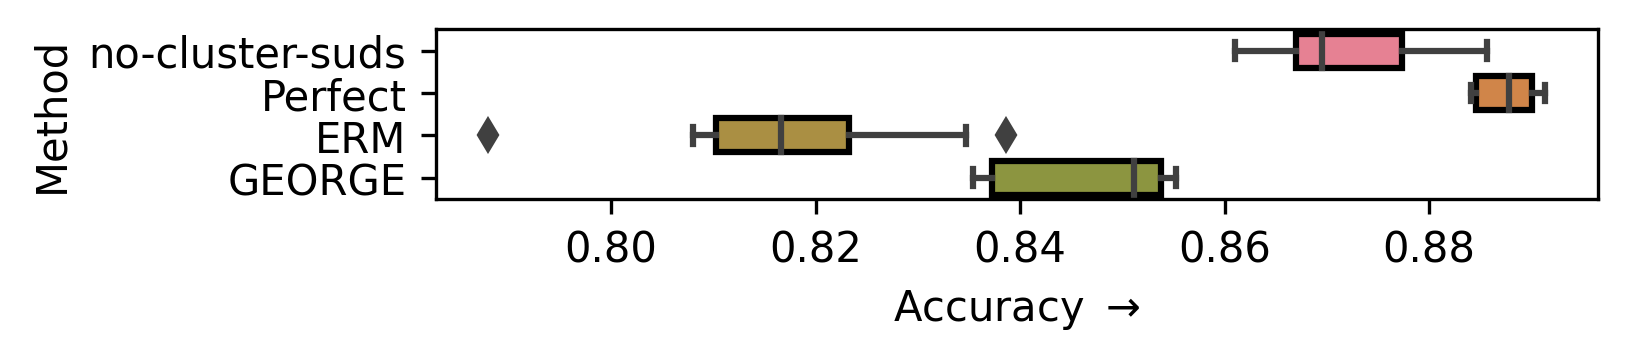

In [22]:
plot(data, metrics=[Metrics.acc], x_limits=(nan, nan), **plot_kwargs)

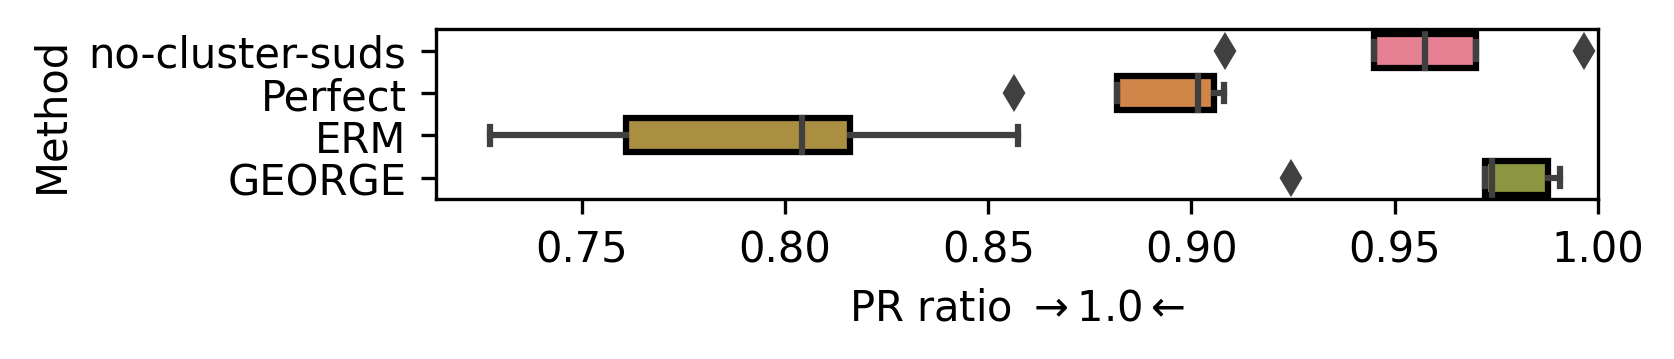

In [23]:
plot(data, metrics=[Metrics.prr], x_limits=(nan, 1), **plot_kwargs)

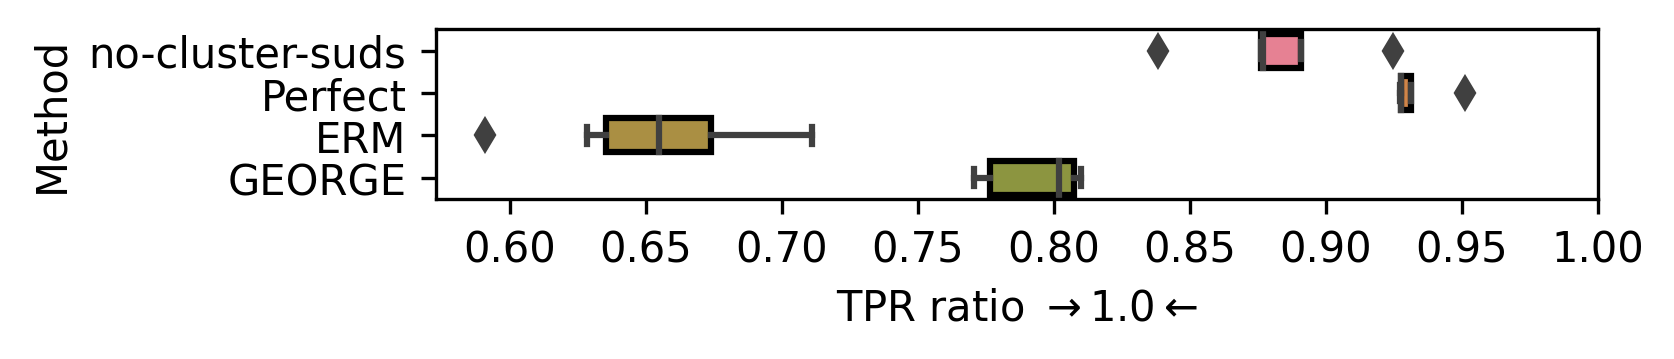

In [24]:
plot(data, metrics=[Metrics.tprr], x_limits=(nan, 1), **plot_kwargs)

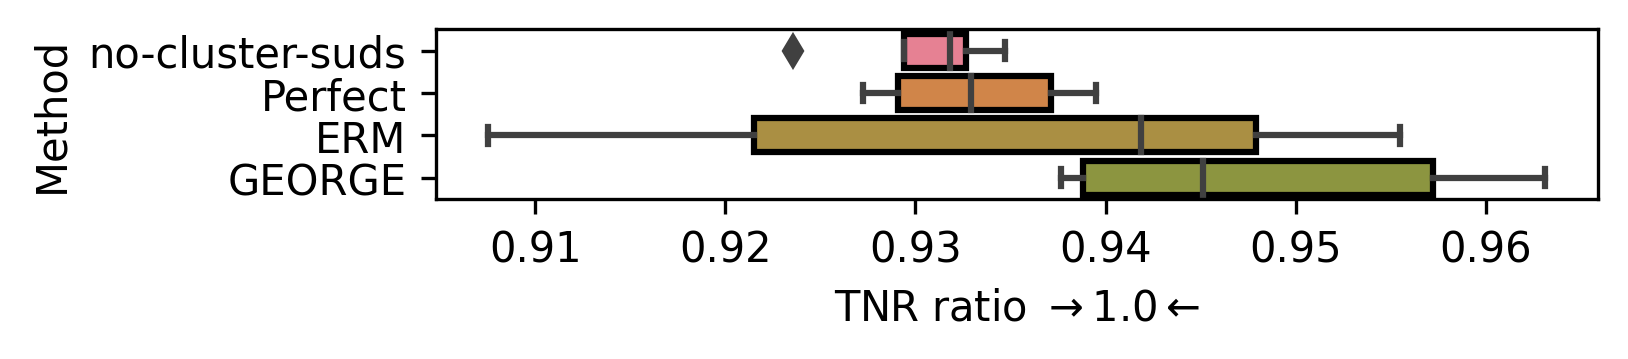

In [25]:
plot(data, metrics=[Metrics.tnrr], x_limits=(nan, nan), **plot_kwargs)